In [311]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [312]:
mat = loadmat("../data/Pp_M_Tokyo_U_N_26h_1.mat")

A = mat["A"].tocoo()
coordinates = mat["coordinates"]

In [313]:
nodes = pd.DataFrame({"id": range(coordinates.shape[0]), "x": coordinates[:, 0], "y": coordinates[:, 1]})
print(nodes.shape)
nodes.head()

(411, 3)


,id,x,y
0,0,1120.9976,827.8922
1,1,644.6653,1235.1908
2,2,607.8474,1182.2650
3,3,649.2676,965.9595
4,4,506.5980,717.4383


In [314]:
edges = pd.DataFrame({"source": A.row, "target": A.col, "weight": A.data})
edges.head()

,source,target,weight
0,21,0,0.016391
1,111,0,0.016633
2,112,0,0.007955
3,114,0,0.007524
4,119,0,0.008532


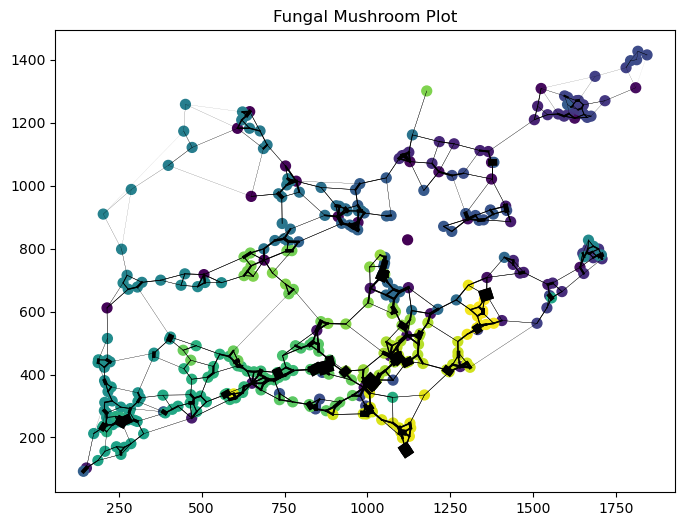

In [315]:
plt.figure(figsize=(8, 6))
max_weight = A.data.max()
for start, end, weight in zip(A.row, A.col, A.data):
    start_coords = coordinates[start]
    end_coords = coordinates[end]
    plt.plot([start_coords[0], end_coords[0]], [start_coords[1], end_coords[1]], '-', color="black", linewidth=weight*10/max_weight)
plt.scatter(x=coordinates[:, 0], y=coordinates[:, 1], s=50, c=range(coordinates.shape[0]), cmap="viridis")
plt.title("Fungal Mushroom Plot")
#plt.axis("off") # can add back in as the numbers are still fairly relevant
plt.show()

In [316]:
G = nx.Graph()
for node in nodes.to_dict("records"):
    G.add_node(node["id"])
for edge in edges.to_dict("records"):
    G.add_edge(edge["source"], edge["target"], weight=edge["weight"])

In [317]:
coords_2D = pd.DataFrame(coordinates).to_dict("index")
coords_2D = {key: [value[0], value[1]] for key, value in coords_2D.items()}

In [318]:
edge_weights = [G[u][v]["weight"]/10000 for u, v in G.edges]
max_edge_weight = max(edge_weights)
edge_weights = [weight*10/max_edge_weight for weight in edge_weights]

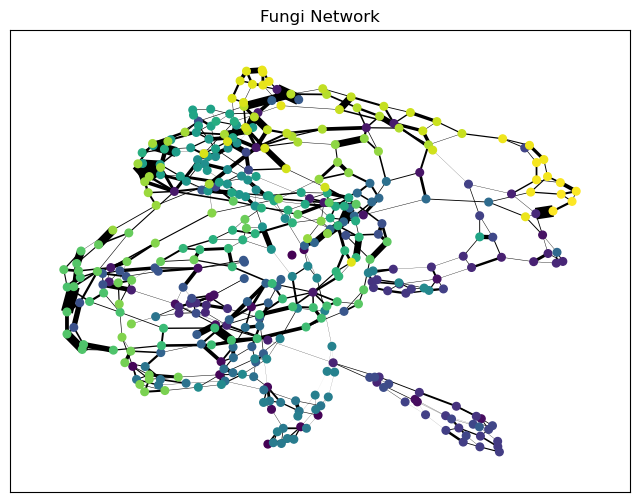

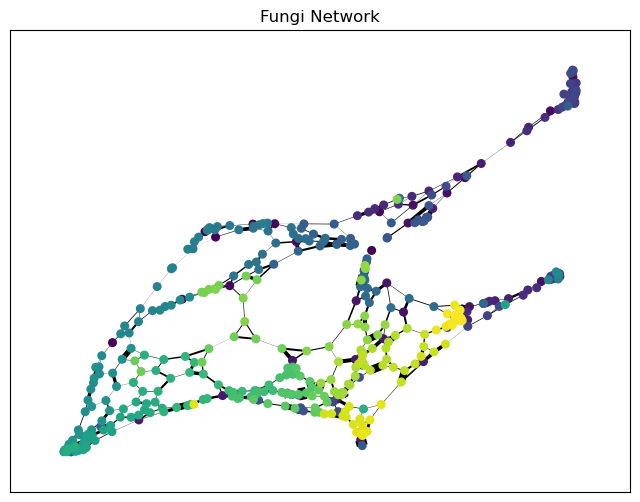

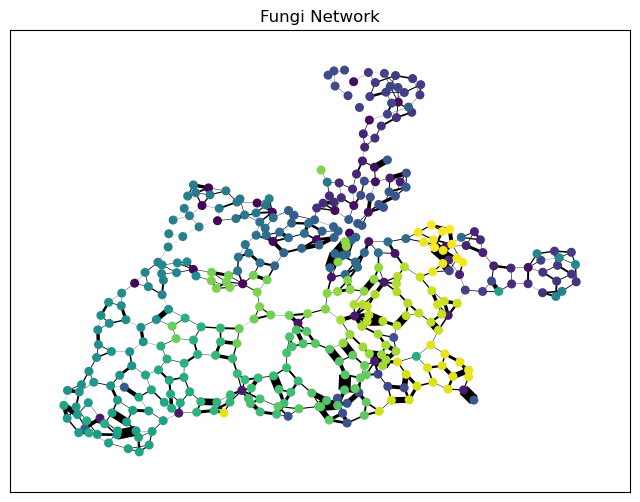

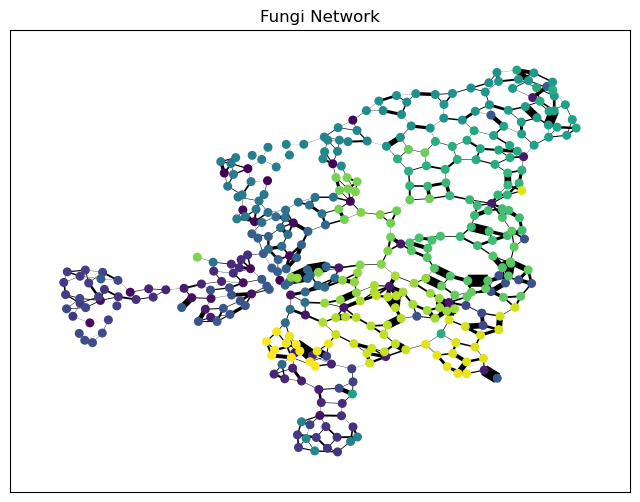

In [319]:
for pos in [nx.spring_layout(G, seed=42, weight=None), nx.spring_layout(G, seed=42, pos=coords_2D, weight=None),
            nx.kamada_kawai_layout(G, weight=None), nx.kamada_kawai_layout(G, pos=coords_2D, weight=None)]:
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G, pos, node_size=30, node_color=list(G.nodes), cmap="viridis")
    nx.draw_networkx_edges(G, pos, width=edge_weights)
    plt.title("Fungi Network")
    #plt.axis("off")
    plt.show()